# Notebook application example of CounterFactual Augmentation 

# Simple example with generated data


## Data Loading

For the sake of an example we consider a two-class problem with 3 features data. Each feature following a Gaussian Distribution with different parameters $(\mu, \sigma^2)$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from cfa import CFA

# Number of samples per class
n_1 = 10
n_2 = 2

# Class 1 parameters
mean_class1 = [.5,.5]
std_class1 = [.1,.1]

# Class 2 parameters
mean_class2 = [0,0]
std_class2 = [.1,.1]

# Generate data 
data_class1 = np.random.normal(loc=mean_class1, scale=std_class1, size=(n_1, 2))
data_class2 = np.random.normal(loc=mean_class2, scale=std_class2, size=(n_2, 2))
# Create DataFrame and add class labels
df_class1 = pd.DataFrame(data_class1, columns=['Feature1', 'Feature2'])
df_class1['Class'] = 1
df_class2 = pd.DataFrame(data_class2, columns=['Feature1', 'Feature2'])
df_class2['Class'] = 2
df = pd.concat([df_class1, df_class2], ignore_index=True)

# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)


df




Feature1  Feature2  Class
0   0.429656  0.398869      1
1  -0.101634  0.020309      2
2   0.175167 -0.222093      2
3   0.445796  0.390605      1
4   0.504307  0.476932      1
5   0.531210  0.581629      1
6   0.463702  0.417235      1
7   0.591443  0.529638      1
8   0.661813  0.559278      1
9   0.496730  0.387156      1
10  0.460751  0.373943      1
11  0.515691  0.442837      1

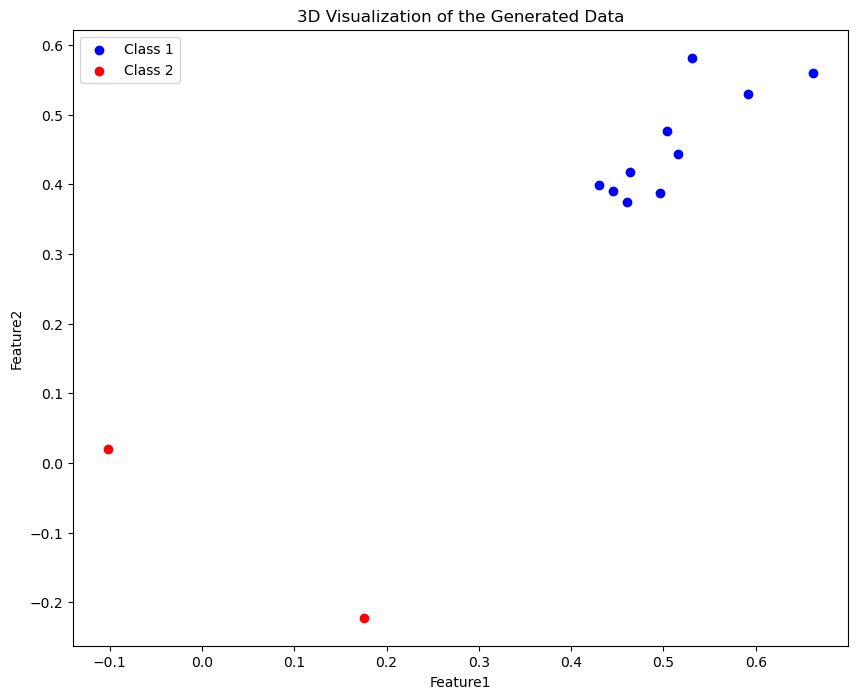

In [2]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

ax.scatter(df_class1['Feature1'], df_class1['Feature2'], color='blue', label='Class 1')
ax.scatter(df_class2['Feature1'], df_class2['Feature2'], color='red', label='Class 2')

ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')

ax.set_title('3D Visualization of the Generated Data')
ax.legend()

plt.show()

In [7]:
# Creating CFA synthetic counterfactuals data
# For this example we fix tol very high to show that the algorithm works

cfa = CFA(fd=2, tol=0.6)

X = df[['Feature1', 'Feature2']].values
y = df['Class'].values
synthetic_counterfactuals = np.array(cfa.run_cfa(X, y))
synthetic_counterfactuals



array([[-8.54931039e-02,  1.20448910e-02],
       [-2.69826873e-02,  9.83717367e-02],
       [-7.94458957e-05,  2.03068852e-01],
       [-6.75876271e-02,  3.86747934e-02],
       [ 3.05858624e-01, -6.63972354e-02],
       [ 3.76229213e-01, -3.67572421e-02],
       [ 2.11145428e-01, -2.08880075e-01],
       [ 2.30106811e-01, -1.53199030e-01]])

In [8]:
# Add the synthetic counterfactuals to the original data, the class label is 2 (minority classes), add column that indicates the synthetic counterfactuals or not

df_cfa = pd.DataFrame(synthetic_counterfactuals, columns=['Feature1', 'Feature2'])
df_cfa['Class'] = 2
df_cfa['Synthetic'] = 1
df_cfa = pd.concat([df, df_cfa], ignore_index=True)
df_cfa['Synthetic'] = df_cfa['Synthetic'].fillna(0)
df_cfa





Feature1  Feature2  Class  Synthetic
0   0.429656  0.398869      1        0.0
1  -0.101634  0.020309      2        0.0
2   0.175167 -0.222093      2        0.0
3   0.445796  0.390605      1        0.0
4   0.504307  0.476932      1        0.0
5   0.531210  0.581629      1        0.0
6   0.463702  0.417235      1        0.0
7   0.591443  0.529638      1        0.0
8   0.661813  0.559278      1        0.0
9   0.496730  0.387156      1        0.0
10  0.460751  0.373943      1        0.0
11  0.515691  0.442837      1        0.0
12 -0.085493  0.012045      2        1.0
13 -0.026983  0.098372      2        1.0
14 -0.000079  0.203069      2        1.0
15 -0.067588  0.038675      2        1.0
16  0.305859 -0.066397      2        1.0
17  0.376229 -0.036757      2        1.0
18  0.211145 -0.208880      2        1.0
19  0.230107 -0.153199      2        1.0

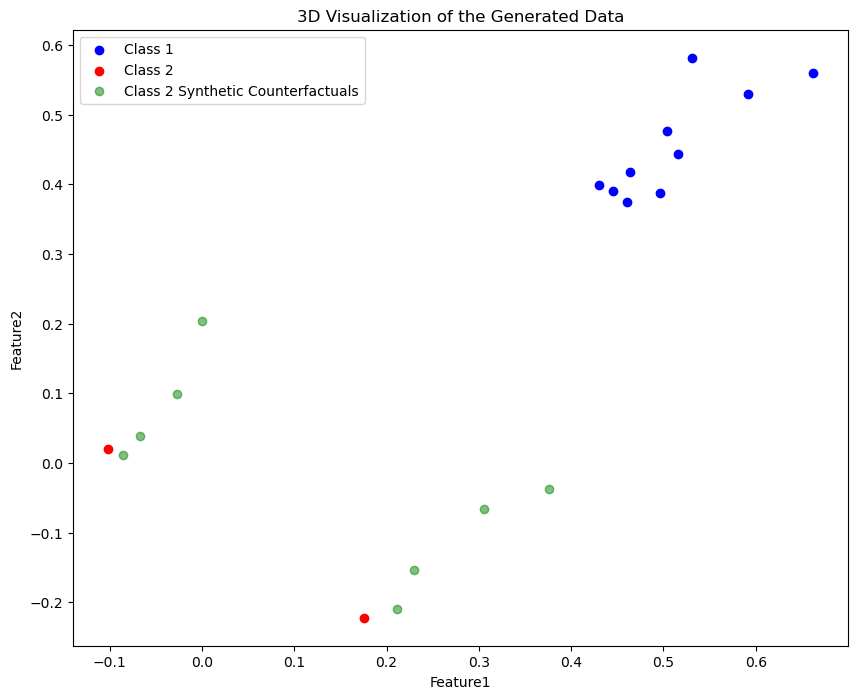

In [9]:
# 3D Plotting (with synthetic counterfactuals alpha = 0.5)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

#plot points from class 1
ax.scatter(df_cfa[df_cfa['Class'] == 1]['Feature1'], df_cfa[df_cfa['Class'] == 1]['Feature2'], color='blue', label='Class 1')
#plot point from class 2 not synthetic counterfactuals
ax.scatter(df_cfa[(df_cfa['Class'] == 2) & (df_cfa['Synthetic'] == 0)]['Feature1'], df_cfa[(df_cfa['Class'] == 2) & (df_cfa['Synthetic'] == 0)]['Feature2'], color='red', label='Class 2')

#plot point from class 2 synthetic counterfactuals
ax.scatter(df_cfa[(df_cfa['Class'] == 2) & (df_cfa['Synthetic'] == 1)]['Feature1'], df_cfa[(df_cfa['Class'] == 2) & (df_cfa['Synthetic'] == 1)]['Feature2'], color='green', alpha=0.5, label='Class 2 Synthetic Counterfactuals')



ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')

ax.set_title('3D Visualization of the Generated Data')
ax.legend()

plt.show()

## CounterFactual Augmentation


# Using Datasets 


## Data loading


In [10]:
data = pd.read_csv('data/diabetes.csv')
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0              6      148             72             35        0  33.6  \
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

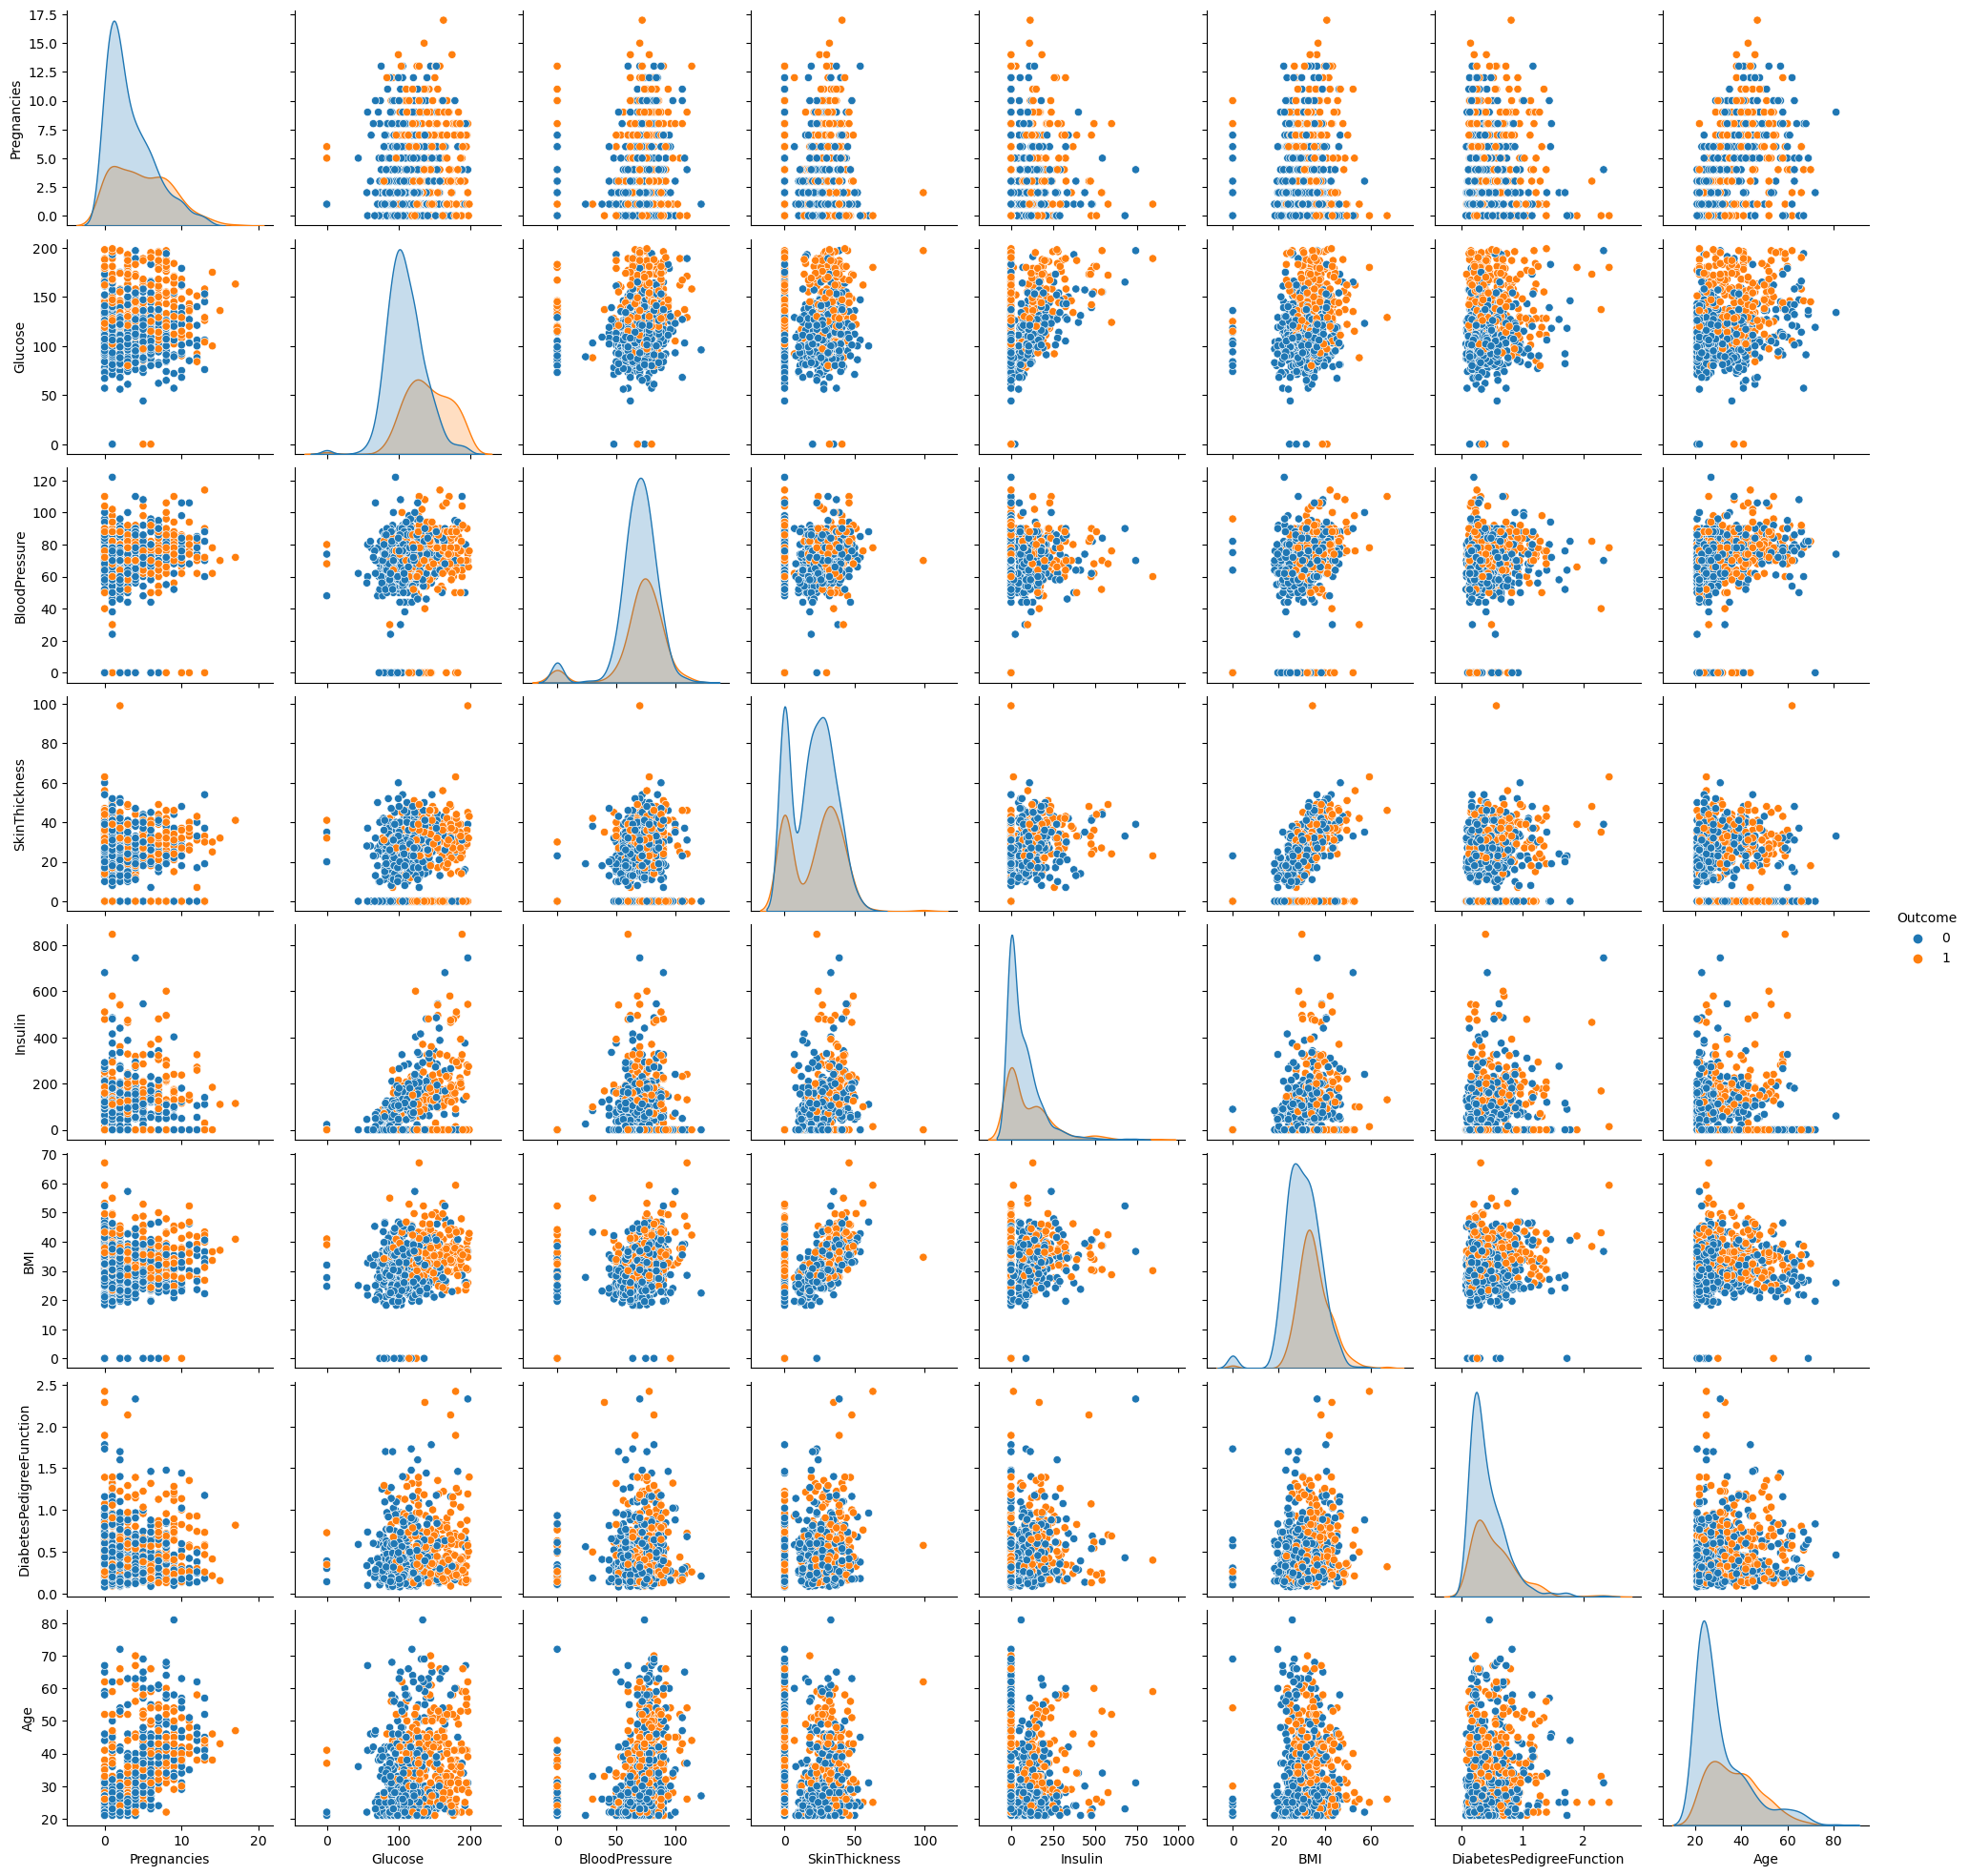

In [11]:
import seaborn as sns

sns.pairplot(data, hue='Outcome')

Outcome
0    500
1    268
Name: count, dtype: int64

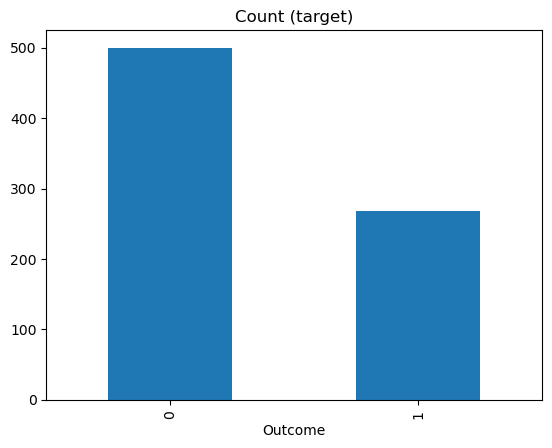

In [24]:
X_data = data.drop('Outcome', axis=1)
y_data = data['Outcome']
# plot imbalance

y_data.value_counts().plot(kind='bar', title='Count (target)')
y_data.value_counts()

# Generating data

In [25]:
cfa = CFA(fd=2, tol=0.2)

X = X_data.values
y = y_data.values
synthetic_counterfactuals = np.array(cfa.run_cfa(X, y))
synthetic_counterfactuals.shape


(104, 8)

In [26]:
# merging the synthetic counterfactuals with the original data
df_cfa = pd.DataFrame(synthetic_counterfactuals, columns=data.columns[:-1])
df_cfa['Outcome'] = 1
df_cfa['Synthetic'] = 1
df_cfa = pd.concat([data, df_cfa], ignore_index=True)
df_cfa['Synthetic'] = df_cfa['Synthetic'].fillna(0)
df_cfa

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0            6.0    148.0           72.0           35.0      0.0  33.6  \
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
867          7.0     99.0           58.0           26.0      0.0  41.7   
868         14.0     69.0           78.0           24.0      0.0  35.5   
869          4.0    105.0           62.0           21.0      0.0  27.5   
870         13.0     91.0           66.0            0.0      0.0  19.2   
871          4.0     97.0           68.0           25.0      0.0  36.7   

     DiabetesPedigreeFunction   Age  Outcome  Synthetic  
0                       0.627  50.0        1        0.0  
1                       0.351  31.0        0        0.0  
2                       0.672  32.0        1        0.0  
3                       0.167  21.0        0        0.0  
4                       2.288  33.0        1        0.0  
..                        ...   ...      ...        ...  
867                     0.483  26.0        1        1.0  
868                     0.584  47.0        1        1.0  
869                     0.313  27.0        1        1.0  
870                     0.040  39.0        1        1.0  
871                     0.514  21.0        1        1.0  

[872 rows x 10 columns]

<Axes: title={'center': 'Count (target)'}, xlabel='Outcome'>

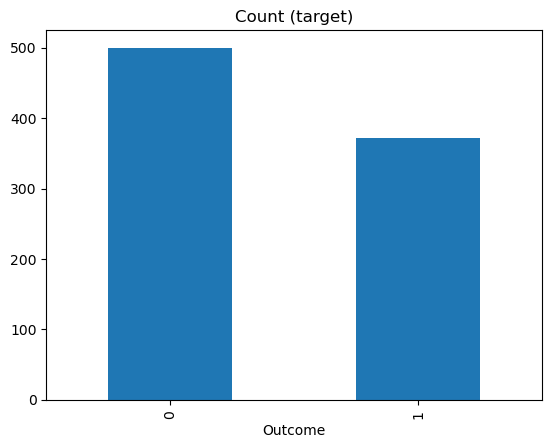

In [27]:
# plot imbalance
df_cfa['Outcome'].value_counts().plot(kind='bar', title='Count (target)')

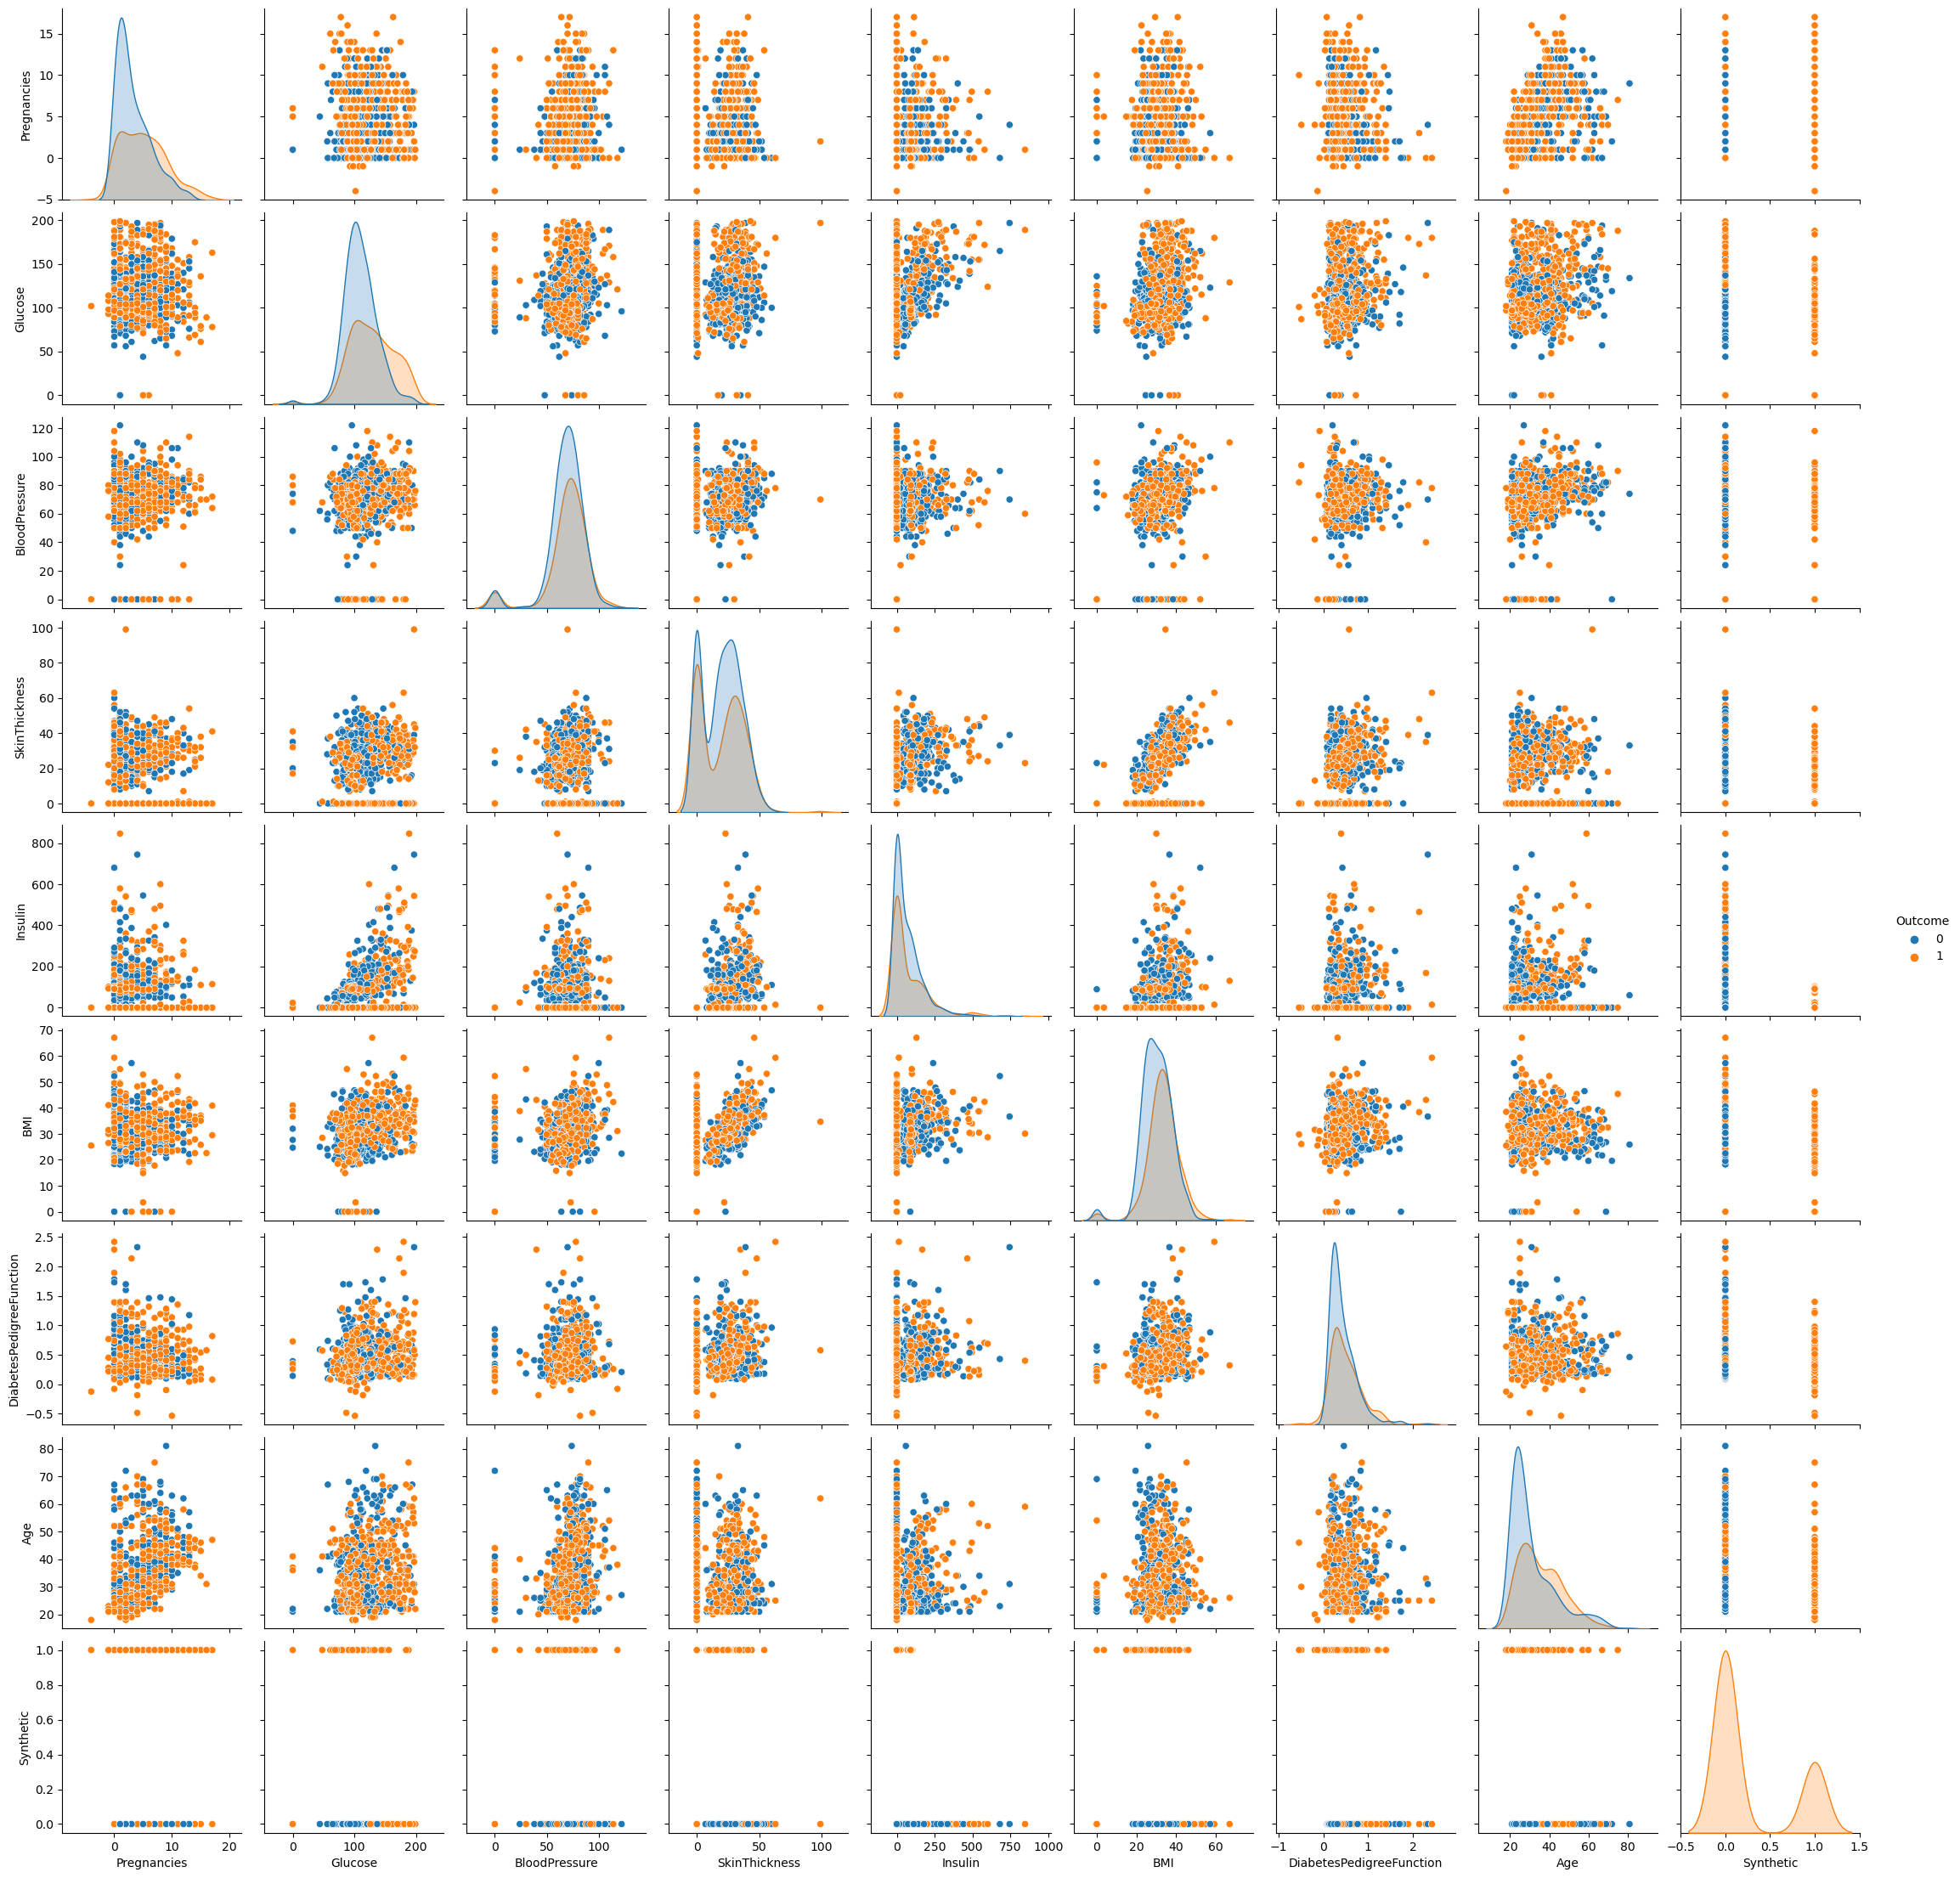

In [28]:
sns.pairplot(df_cfa, hue='Outcome')